<a href="https://colab.research.google.com/github/davidfague/Computational-Neuroscience-tutorials/blob/main/S1_PassiveMembrane/S1_PassiveMembrane%26HHCell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S1 How do we model a passive cell membrane?
## - from passive membrane to Hodgkin-Huxley model

##### Developed in the Neural Engineering Laboratory at the University of Missouri by Ben Latimer & Ziao Chen

![image](https://raw.githubusercontent.com/chenziao/Software_Tutorials_Colab/main/S1_PassiveMembrane/Neuron_1.jpg)

##Install NEURON
First install NEURON package.

TO RUN CODE CLICK THE PLAY BUTTON ON EVERY CELL OR GO TO THE TOP AND CLICK RUNTIME THEN RUN ALL

In [1]:
!pip install neuron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 31.7 MB/s eta 0:00:00


## Introduction videos of neurobiology basics

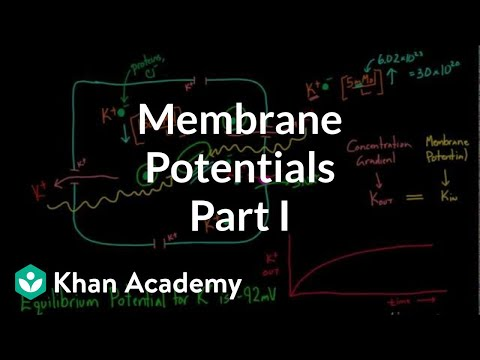

In [2]:
from IPython.display import HTML,YouTubeVideo
YouTubeVideo('PtKAeihnbv0')

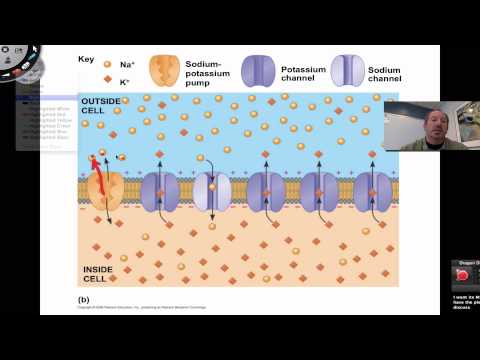

In [3]:
YouTubeVideo('RTRZNK9Aahc')

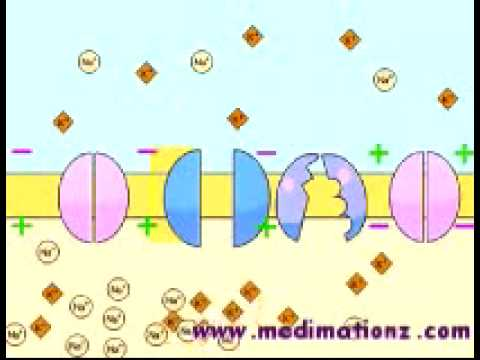

In [4]:
YouTubeVideo('U0NpTdge3aw')

### In this tutorial, we'll explore the properties of the cell membrane and the mechanisms of the action potential. We'll introduce you how to simulate a cell in the NEURON + Python environment. If this is your first time coding, don't worry! Just click the "Run" button above to go through step-by-step. You don't need to change anything yet.

### Before you start any project, you need to get the tools. In Python, we do this using the "import" statement in the cell below. Click "Run" to proceed.

In [5]:
from neuron import h

h.load_file('stdrun.hoc')

1.0

## 1) <u>Create the cell and define its geometry

### NEURON defines a section of a cell as a cylinder. Remember, cells in NEURON are simplified. We will make a one-compartment cell which is just a cylinder with length and diameter.

![image](https://raw.githubusercontent.com/chenziao/Software_Tutorials_Colab/main/S1_PassiveMembrane/cylinder.png)

In [6]:
#Create the soma section and define the default parameters
soma = h.Section(name='soma')
soma.diam = 200 # micrometers
soma.L = 100 # micrometers

## 2) <u>Define the cell's biophysics

### Insert the Hodgkin-Huxley channels and define the conductance. First let's make a passive cell by setting the conductances of the active channels (gNa,gK) to 0.

In [7]:
soma.cm = 1.4884e-4/6.2832e-4 # membrane capacitance uF/cm2

soma.insert('hh')
soma.gnabar_hh = 0 # Sodium channel
soma.gkbar_hh = 0 # Potassium channel
soma.gl_hh = 2.0e-5 # leak channel S/cm2
soma.el_hh = -70 # reveral potential mV

h.v_init= -60

## 3) <u>Inject Current
    
### Neuroscientists call this experiment a "current clamp". We place an electrode into the cell and inject current.

In [8]:
# Inject current in the middle of the soma
stim = h.IClamp(soma(0.5))
stim.delay = 100.0 # delay in ms
stim.dur = 500.0 # duration in ms
stim.amp = 1.0 # amplitude in nA

## 4) <u>Define simulation parameters and run!

In [9]:
h.tstop = tstop = 800 # how long to run the simulation in ms
h.dt = 0.025 # time step (resolution) of the simulation in ms

# define two vectors for recording variables
v0_vec = h.Vector()
t_vec = h.Vector()

# record the voltage (_ref_v) and time (_ref_t) into the vectors we just created
v0_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

h.run()

0.0

## 5) <u> Visualize the membrane potential
    
### The data isn't going to visualize itself! We use a package called matplotlib to draw the vectors so we can see them.

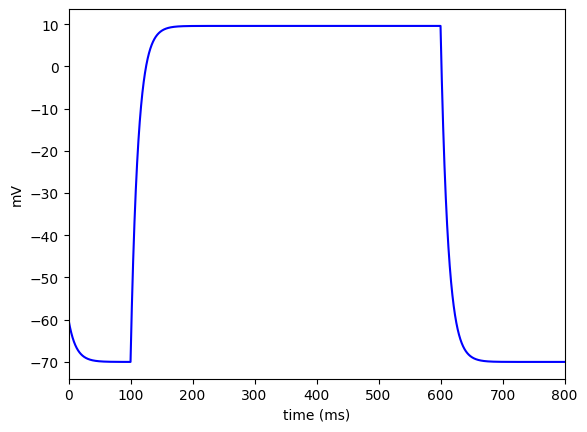

In [10]:
# use inline plot
%matplotlib inline
# use interactive plot
# %matplotlib notebook
import matplotlib.pyplot as plt # We use this package for visualization

plt.figure()
plt.plot(t_vec, v0_vec,'b')
plt.xlim(0, tstop)
plt.xlabel('time (ms)')
plt.ylabel('mV')

plt.show()

## 6) <u> Get some action potentials!
    
### We will make the conductances of the active channels nonzero so that we will see some action potentials.

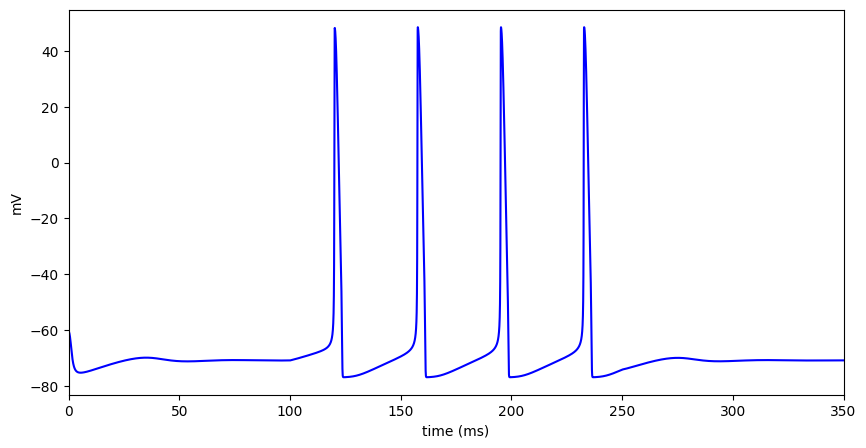

In [11]:
soma.gnabar_hh = 0.12 # Sodium channel S/cm2
soma.gkbar_hh = 0.012 # Potassium channel S/cm2

stim.delay = 100.0 # delay in ms
stim.dur = 150.0 # duration in ms
stim.amp = 0.03 # amplitude in nA

h.tstop = tstop = 350

# run the simulation!
h.run()

plt.figure(figsize=(10,5))
plt.plot(t_vec, v0_vec,'b')
plt.xlim(0, tstop)
plt.xlabel('time (ms)')
plt.ylabel('mV')

plt.show()

## 7) <u> Record the gating variables
    
### You should see some spikes in the plot above. If you don't, go back to the top of the notebook and run all the cells again. Neurons spike because of the voltage dependent proteins embedded in their membranes. Let's record those and then plot them just as we did for the membrane voltage.

In [12]:
m_na = h.Vector()
h_na = h.Vector()
n_k = h.Vector()

m_na.record(soma(0.5)._ref_m_hh)
h_na.record(soma(0.5)._ref_h_hh)
n_k.record(soma(0.5)._ref_n_hh)

h.run()

0.0

## 8) <u>Visualize membrane potential and gating variables together
### This should look familiar. We're just going to plot all of the variables we just recorded at the same time so we can investigate how spikes occur.

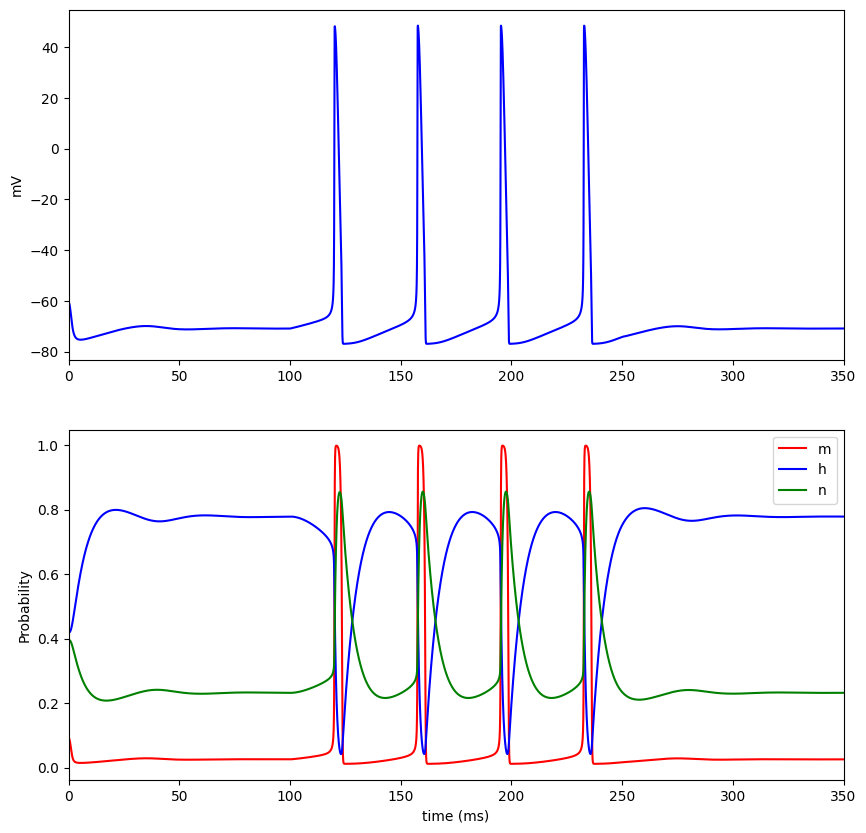

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t_vec, v0_vec,'b')
plt.xlim(0, tstop)
plt.ylabel('mV')

plt.subplot(2,1,2)
plt.plot(t_vec, m_na,'r')
plt.plot(t_vec, h_na,'b')
plt.plot(t_vec, n_k, 'g')
plt.xlim(0, tstop)
plt.xlabel('time (ms)')
plt.ylabel('Probability')
plt.legend(['m','h','n'])

plt.show()

### You did it! Now you understand how a neuron is implemented in code. Time for the hard part... understanding the science and math behind those spikes. You can move on to the next section and change variables (such as the conductances of the Na and K channels) using the interactive controls to see the effects.

## 9) <u> Interact with the model

##### So far, we've built the cell and simulated it with one set of parameters. But what if we want to change the parameters to see the effect on the output? In this part of the tutorial, we'll set the model up and then use sliders to interact with the parameters. Don't worry about all the code that's coming up, it's just a repeat of what we've already done.

In [14]:
%reset -f
import time
time.sleep(1)

In [15]:
from neuron import h
import ipywidgets as widgets
from ipywidgets import HBox,VBox,Label,Layout
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

h.load_file('stdrun.hoc')

soma = h.Section(name='soma')
soma.L = 100 # um
soma.insert('hh')
stim = h.IClamp(soma(0.5))

v0_vec = h.Vector()
t_vec = h.Vector()
m_na = h.Vector()
h_na = h.Vector()
n_k = h.Vector()
m_na.record(soma(0.5)._ref_m_hh)
h_na.record(soma(0.5)._ref_h_hh)
n_k.record(soma(0.5)._ref_n_hh)
v0_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

def activemodel(diam,cm,el,gl,gna,gk,tstop,dur,amp):
    soma.diam = diam
    soma.cm = cm*1.4884e-4/6.2832e-4
    soma.gnabar_hh = gna*1e-3
    soma.gkbar_hh = gk*1e-3
    soma.gl_hh = gl*1e-6
    soma.el_hh = el

    stim.delay = dur[0]
    stim.dur = dur[1]-dur[0]
    stim.amp = amp

    h.tstop = tstop
    h.v_init = el
    h.run()

    plt.close()
    plt.figure(figsize=(12,10))
    plt.subplot(2,1,1)
    plt.plot(t_vec, v0_vec,'b')
    plt.xlim(0, tstop)
    plt.ylabel('mV')
    plt.legend('V')
    plt.subplot(2,1,2)
    plt.plot(t_vec, m_na,'r')
    plt.plot(t_vec, h_na,'b')
    plt.plot(t_vec, n_k, 'g')
    plt.xlim(0, tstop)
    plt.xlabel('time (ms)')
    plt.ylabel('Probability')
    plt.legend(['m','h','n'])
    plt.show()

In [16]:
# default settings
diam = 200
cm = 1
el = -70
gl = 30
gna0 = 120
gk0 = 12
tstop = 500
dur = [100,400]
amp = 0.1

w_reset = widgets.Button(description='Reset',icon='history',button_style='primary')
w_pass = widgets.ToggleButton(value=False,icon='check',button_style='info',description='Toggle')
w_el = widgets.FloatSlider(value=el,min=-80,max=-60,step=.2,continuous_update=False,readout_format='.1f')
w_gl = widgets.FloatSlider(value=gl,min=5,max=50,step=.2,continuous_update=False,readout_format='.1f')
w_gna = widgets.FloatSlider(value=gna0,min=0,max=200,step=.5,continuous_update=False,readout_format='.1f')
w_gk = widgets.FloatSlider(value=gk0,min=0,max=30,step=.1,continuous_update=False,readout_format='.1f')

w_tstop = widgets.FloatText(value=tstop)
w_dur = widgets.FloatRangeSlider(value=dur,min=0,max=500,step=5,continuous_update=False,readout_format='.0f')
w_amp = widgets.FloatLogSlider(value=amp,min=-3,max=1,step=.04,continuous_update=False,readout_format='.3f')
w_diam = widgets.FloatSlider(value=diam,min=100,max=300,step=2,continuous_update=False,readout_format='.0f')
w_cm = widgets.FloatLogSlider(value=cm,min=-1,max=1,step=.05,continuous_update=False,readout_format='.1f')

def reset_default(*args):
    w_pass.value = False
    w_el.value = el; w_gl.value = gl
    w_gna.value = gna0; w_gk.value = gk0
    w_gna.disabled = w_gk.disabled = False
    w_dur.max = w_tstop.value = tstop; w_dur.value = dur
    w_diam.value = diam; w_cm.value = cm
w_reset.on_click(reset_default)

def update_pass(*args):
    if w_pass.value:
        global gna,gk
        gna = w_gna.value
        gk = w_gk.value
        w_gna.value = w_gk.value = 0
        w_gna.disabled = w_gk.disabled = True
    else:
        w_gna.value = gna
        w_gk.value = gk
        w_gna.disabled = w_gk.disabled = False
w_pass.observe(update_pass,'value')

def update_dur(*args):
    w_dur.max = w_tstop.value
w_tstop.observe(update_dur,'value')


ui = VBox([w_reset, HBox([VBox([Label('Passive Cell'),Label('E_l (mV)'),Label('g_leak (μS/cm^2)'),
                 Label('g_Na (mS/cm^2)'),Label('g_K (mS/cm^2)')],layout=Layout(width='16%')),
           VBox([w_pass,w_el,w_gl,w_gna,w_gk],layout=Layout(width='34%')),
           VBox([Label('tstop (ms)'),Label('Injection duration (ms)'),Label('I_inject (nA)'),
                 Label('soma diameter (μm)'),Label('capacitance scale')],layout=Layout(width='16%')),
           VBox([w_tstop,w_dur,w_amp,w_diam,w_cm],layout=Layout(width='34%')) ]) ])

out = widgets.interactive_output(activemodel,{'el':w_el,'gl':w_gl,'gna':w_gna,'gk':w_gk,
                                              'tstop':w_tstop,'dur':w_dur,'amp':w_amp,'diam':w_diam,'cm':w_cm})

display(ui,out)

Output()